In [1]:
import sys
sys.setrecursionlimit(10000000)

In [2]:
import time
import random
import copy
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def matmul_bruteforce(A, B):
    n = len(A)
    C = [[0] * n for _ in range(n)]
    for i in range(n):
        for j in range(n):
            for k in range(n):
                C[i][j] += A[i][k] * B[k][j]
    return C

In [4]:
def add_matrix(A, B):
    n = len(A)
    return [[A[i][j] + B[i][j] for j in range(n)] for i in range(n)]

In [5]:
def sub_matrix(A, B):
    n = len(A)
    return [[A[i][j] - B[i][j] for j in range(n)] for i in range(n)]

In [6]:
def matmul_strassen(A, B):
    n = len(A)
    if n == 1:
        return [[A[0][0] * B[0][0]]]

    mid = n // 2
    # Divide matrices into quadrants
    A11 = [row[:mid] for row in A[:mid]]
    A12 = [row[mid:] for row in A[:mid]]
    A21 = [row[:mid] for row in A[mid:]]
    A22 = [row[mid:] for row in A[mid:]]
    B11 = [row[:mid] for row in B[:mid]]
    B12 = [row[mid:] for row in B[:mid]]
    B21 = [row[:mid] for row in B[mid:]]
    B22 = [row[mid:] for row in B[mid:]]

    # Compute the 7 products
    M1 = matmul_strassen(sub_matrix(A12, A22), add_matrix(B21, B22))
    M2 = matmul_strassen(add_matrix(A11, A22), add_matrix(B11, B22))
    M3 = matmul_strassen(sub_matrix(A11, A21), add_matrix(B11, B12))
    M4 = matmul_strassen(add_matrix(A11, A12), B22)
    M5 = matmul_strassen(A11, sub_matrix(B12, B22))
    M6 = matmul_strassen(A22, sub_matrix(B21, B11))
    M7 = matmul_strassen(add_matrix(A21, A22), B11)

    # Combine results
    C11 = add_matrix(sub_matrix(add_matrix(M1, M2), M4), M6)
    C12 = add_matrix(M4, M5)
    C21 = add_matrix(M6, M7)
    C22 = add_matrix(sub_matrix(sub_matrix(M2, M3), M7), M5)

    # Assemble final matrix
    C = [[0] * n for _ in range(n)]
    for i in range(mid):
        for j in range(mid):
            C[i][j] = C11[i][j]
            C[i][j + mid] = C12[i][j]
            C[i + mid][j] = C21[i][j]
            C[i + mid][j + mid] = C22[i][j]
    return C


  n  BruteForce Time (s)  Strassen Time (s)
 64             0.032684           0.316103
128             0.219949           2.162743
256             1.724237          15.473858
512            15.699585         111.443238


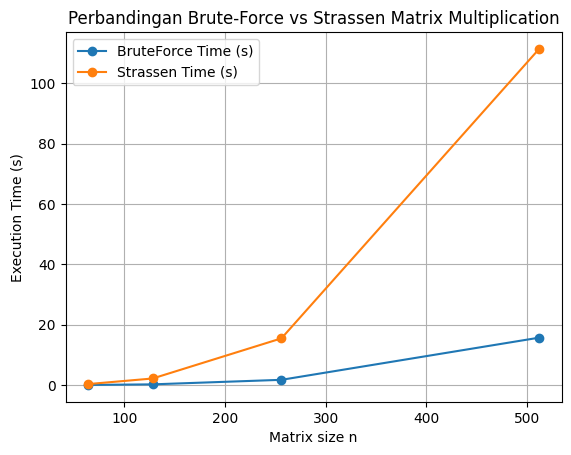

In [7]:
# Benchmarking
sizes = [64, 128, 256, 512]
bf_times = []
st_times = []

for n in sizes:
    A = [[random.randint(0, 100) for _ in range(n)] for _ in range(n)]
    B = [[random.randint(0, 100) for _ in range(n)] for _ in range(n)]

    # Brute-force
    start = time.perf_counter()
    matmul_bruteforce(A, B)
    bf_times.append(time.perf_counter() - start)

    # Strassen
    start = time.perf_counter()
    matmul_strassen(A, B)
    st_times.append(time.perf_counter() - start)

# Create DataFrame and plot
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'n': sizes,
    'BruteForce Time (s)': bf_times,
    'Strassen Time (s)': st_times
})

print(df.to_string(index=False))

df.plot(x='n', y=['BruteForce Time (s)', 'Strassen Time (s)'], marker='o')
plt.xlabel('Matrix size n')
plt.ylabel('Execution Time (s)')
plt.title('Perbandingan Brute-Force vs Strassen Matrix Multiplication')
plt.grid(True)
plt.show()
